<a href="https://colab.research.google.com/drive/1tnOvFNgXiLtktiSsltTr0s308LZSsEPJ">Abre este Jupyter en Google Colab</a>

# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 0. Imports

In [1]:
# Instalacion de librerías externas
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### 1. Generación del conjunto de datos

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


### 2. Visualización del conjunto de datos

In [3]:
import matplotlib.pyplot as plt

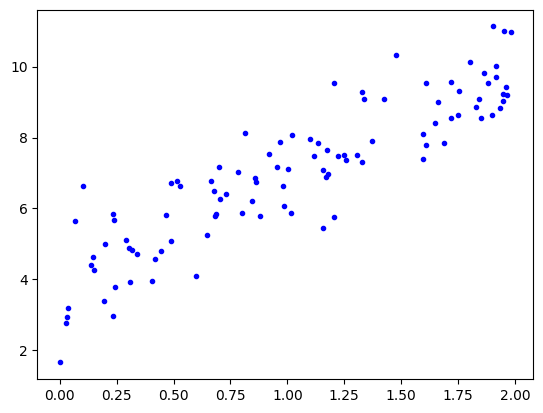

In [4]:
plt.plot(X, y, "b.")
plt.show()

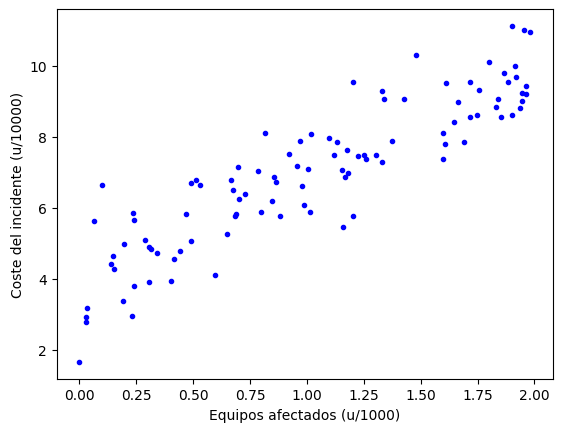

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

### 3. Modificación del conjunto de datos

In [6]:
import pandas as pd

In [7]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.339015,4.714401
1,0.648130,5.257855
2,1.718442,9.562541
3,1.865663,9.808169
4,0.682916,5.781945
5,1.134348,7.853895
6,1.802209,10.120031
7,1.597512,8.109229
8,0.698476,7.164637
9,0.815456,8.122302


In [8]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,339,47144
1,648,52578
2,1718,95625
3,1865,98081
4,682,57819
5,1134,78538
6,1802,101200
7,1597,81092
8,698,71646
9,815,81223


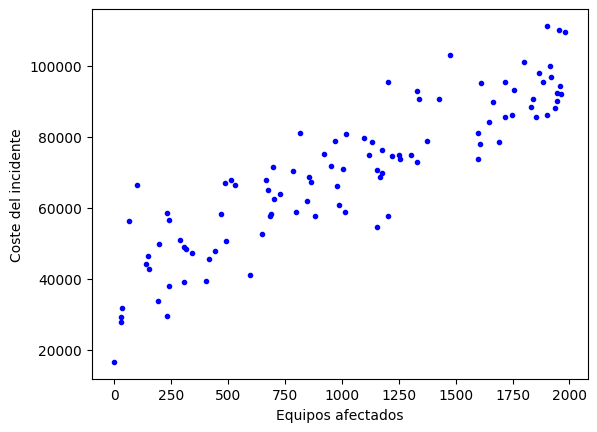

In [9]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 4. Construcción del modelo

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values)

LinearRegression()

In [12]:
# Parámetro theta 0
lin_reg.intercept_

39219.60495213557

In [13]:
# Parámetro theta 1
lin_reg.coef_

array([29.99240172])

In [14]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

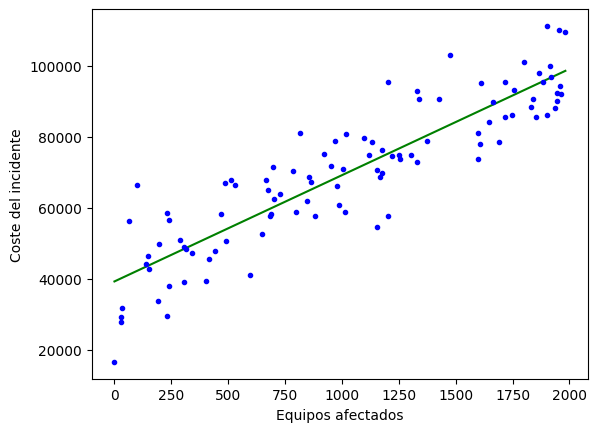

In [15]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 5. Predicción de nuevos ejemplos

In [20]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 78209 €


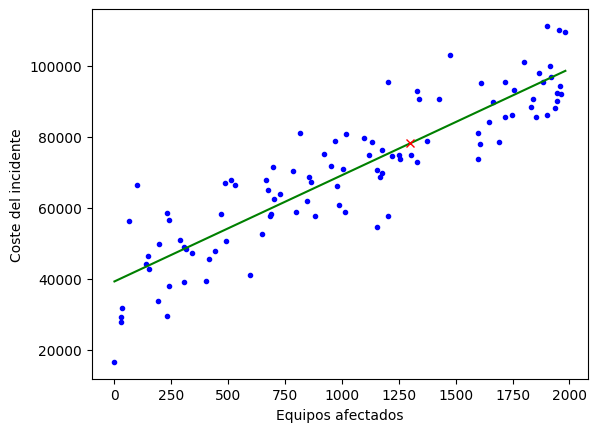

In [21]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()